## Notebook setup

In [1]:
library(tidyverse)
library(arcadiathemeR)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading Suisse fonts...



All custom fonts 'Suisse Int'l, Suisse Int'l Semi Bold, Suisse Int'l Medium, Suisse Int'l Mono' are successfully loaded.


In [2]:
setwd("..")

In [3]:
# adjust plot size rendered inline
options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res = 200)

## Plotting constants

In [4]:
AEGEAN <- c("#5088C5")
AMBER <- c("#F28360")
SEAWEED <- c("#3B9886")
CANARY <- c("#F7B846")
ASTER <- c("#7A77AB")
ROSE <- c("#F898AE")
VITAL <- c("#73B5E3")
TANGERINE <- c("#FFB984")
OAT <- c("#F5E4BE")
WISH <- c("#BABEE0")
LIME <- c("#97CD78")
DRAGON <- c("#C85152")
SKY <- c("#C6E7F4")
DRESS <- c("#F8C5C1")
TAUPE <- c("#DBD1C3")
DENIM <- c("#B6C8D4")
SAGE <- c("#B5BEA4")
MARS <- c("#DA9085")
MARINE <- c("#8A99AD")
SHELL <- c("#EDE0D6")
WHITE <- c("#FFFFFF")
GRAY <- c("#EBEDE8")
CHATEAU <- c("#BAB0A8")
BARK <- c("#8F8885")
SLATE <- c("#43413F")
CHARCOAL <- c("#484B50")
CROW <- c("#292928")
BLACK <- c("#09090A")
FOREST <- c("#596F74")
PARCHMENT <- c("#FEF7F1")
ZEPHYR <- c("#F4FBFF")
LICHEN <- c("#F7FBEF")
DAWN <- c("#F8F4F1")
LAPIS <- c("#2B65A1")
DUSK <- c("#094468")
MELON <- c("#FFCFAF")
CINNABAR <- c("#9E3F41")
SUN <- c("#FFD364")
MUSTARD <- c("#D68D22")
UMBER <- c("#A85E28")
IRIS <- c("#DCDFEF")
TANZANITE <- c("#54448C")
CONCORD <- c("#341E60")
GLASS <- c("#C3E2DB")
TEAL <- c("#6FBCAD")
ASPARAGUS <- c("#2A6B5E")
DEPTHS <- c("#09473E")
PUTTY <- c("#FFE3D4")
CANDY <- c("#E2718F")
AZALEA <- c("#C04C70")
STONE <- c("#EDE6DA")
MUD <- c("#635C5A")
ICE <- c("#E6EAED")
DOVE <- c("#CAD4DB")
CLOUD <- c("#ABBAC4")
STEEL <- c("#687787")
HEATHER <- c("#A96789")
TUMBLEWEED <- c("#E9A482")
WHEAT <- c("#F5DFB2")
SHIRE <- c("#4E7F72")
TOPAZ <- c("#FFCC7B")
SPACE <- c("#282A49")
LIME <- c("#97CD78")
BUTTER <- c("#FFFDBD")
REDWOOD <- c("#52180A")
BLOSSOM <- c("#F4CAE3")
SOIL <- c("#4D2500")
TERRACOTTA <- c("#964222")
BLUSH <- c("#FFF3F4")
LILAC <- c("#6862AB")
GHOST <- c("#FCF7FF")
FERN <- c("#47784A")

# Palettes
PRIMARY <- c(AEGEAN, AMBER, SEAWEED, CANARY, ASTER, ROSE, VITAL, TANGERINE, OAT, WISH, LIME, DRAGON)
SECONDARY <- c(SKY, DRESS, TAUPE, DENIM, SAGE, MARS, MARINE, SHELL)

REGULAR_FONT <- "Suisse Int'l"
CATEGORICAL_FONT <- REGULAR_FONT

# Read in files

In [5]:
metadata <- read_tsv("benchmarking_data/controls/control_metadata.tsv", show_col_types = FALSE) %>%
  mutate(structure_file = str_remove(string = structure_file, pattern = ".pdb")) %>%
  select(structure_file, target_uniprot) %>%
  distinct()

In [6]:
results <- read_csv("outputs/human/selected_mimics/gmmviro3d_benchmarking041725_detailed.csv", show_col_types = FALSE) %>%
  mutate(source_key = str_remove(string = source_key, pattern = ".tsv$")) %>%
  separate(col = source_key, into = c("control", "tool", "alignment_type",
                                      "tmalign_fast", "exact_tmscore",
                                      "tmscore_threshold"),
           sep = "_", remove = FALSE) %>%
  mutate(alignment_type = str_remove(string = alignment_type, pattern = "alignmenttype"),
         tmalign_fast = str_remove(string = tmalign_fast, pattern = "tmalignfast"),
         exact_tmscore = str_remove(string = exact_tmscore, pattern = "exacttmscore"),
         tmscore_threshold = as.numeric(str_remove(string = tmscore_threshold, pattern = "tmscorethreshold"))) %>%
  select(-tmscore_threshold) %>%
  mutate(alignment_type = ifelse(alignment_type == "1", "TM-align", "3Di+AA"),
         tmalign_fast = ifelse(alignment_type == "3Di+AA", "none", tmalign_fast),
         model_type = ifelse(alignment_type == "3Di+AA", "3Di+AA", 
                             ifelse(alignment_type == "TM-align" & grepl(pattern = "evalue", x = feature_set), "hybrid", "TM-align"))) %>%
  left_join(metadata, by = c("query" = "structure_file")) %>%
  mutate(correct = ifelse(target == target_uniprot, "correct hit", "off-target hit"),
         correct = ifelse(is.na(correct), "unknown correct hit", correct),
         # fix c1l correct or incorrect labeling
         correct = ifelse(control == "c1l" & (target == "Q8WXC3" | target == "P10415"), "correct hit", correct))

## Plot figure 5 (actual plot in pub made in python with plotly for interactive capabilities)

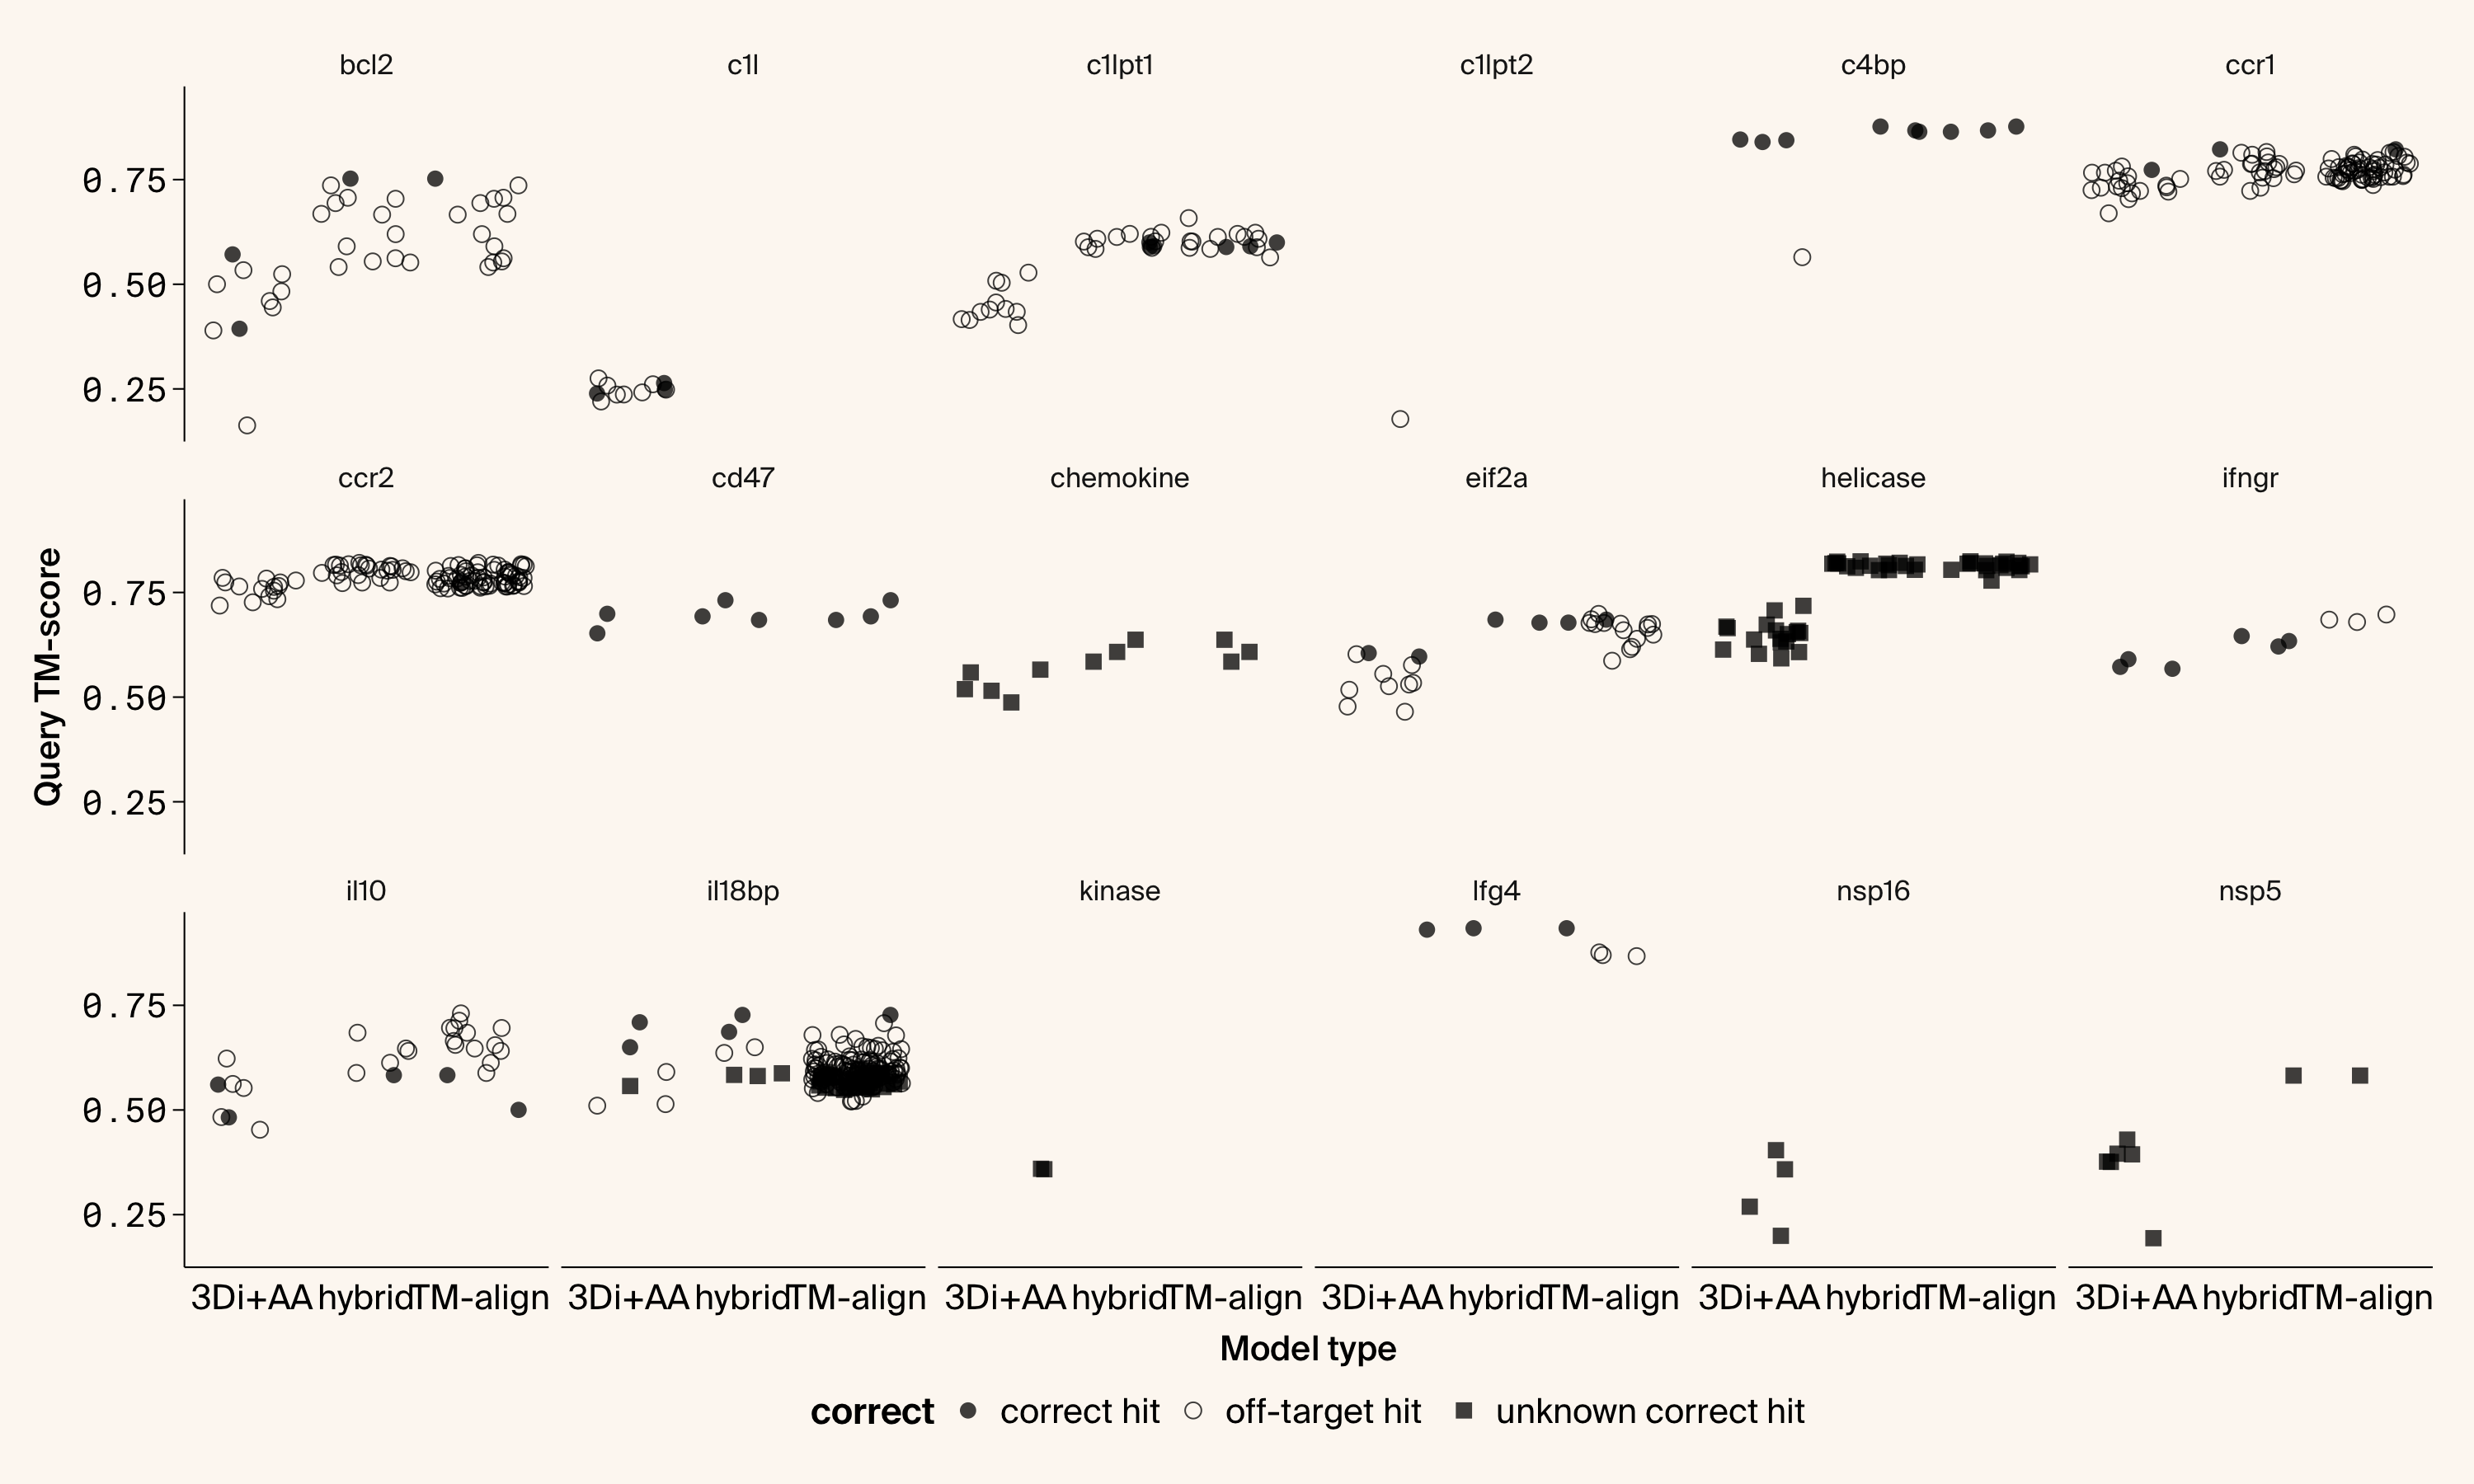

In [7]:
ggplot(results, aes(x = model_type, y = qtmscore, 
                    shape = correct,
                    label = host_gene_names_primary,
                    text = query)) +
  geom_jitter(size = 3, alpha = .75, width = 0.4) +
  facet_wrap(~ control, nrow = 3) +
  theme_classic() +
  labs(x = "Model type", y = "Query TM-score") +
  theme_arcadia(x_axis_type = "categorical", y_axis_type = "numerical") +
  theme(legend.text = ggplot2::element_text(family = CATEGORICAL_FONT, size = 15),
        strip.text = element_text(family = CATEGORICAL_FONT, size = 12),
        legend.position = "bottom") +
  scale_shape_manual(values = c(16, 1, 15))

## Plot figure S1

In [8]:
hit_counts <- results %>%
  group_by(control, model_type, correct) %>%
  summarise(n = n(), .groups = "drop") %>%
  pivot_wider(names_from = correct, values_from = n, values_fill = 0)

In [9]:
results_correct <- results %>%
  filter(correct == "correct hit")

In [10]:
control_map <- read_tsv("benchmarking_data/controls/control_metadata.tsv", show_col_types = FALSE) %>%
  mutate(structure_file = str_remove(string = structure_file, pattern = ".pdb")) %>%
  select(target_gene, target_uniprot) %>%
  mutate(target_gene = tolower(target_gene)) %>%
  distinct() %>%
  filter(!is.na(target_uniprot)) %>%
  mutate(target_gene = ifelse(target_uniprot == "Q8WXC3", "c1lpt1", target_gene),
         target_gene = ifelse(target_uniprot == "P10415", "c1lpt2", target_gene)) %>%
  distinct() 

In [11]:
missed_hits <- metadata %>%
  filter(!is.na(target_uniprot)) %>%
  crossing(model_type = unique(results$model_type)) %>%
  left_join(results_correct, 
            by = c("structure_file" = "query", 
                   "target_uniprot" = "target_uniprot", 
                   "model_type" = "model_type")) %>%
  filter(is.na(control)) %>%  
  group_by(target_uniprot, structure_file, model_type) %>%
  summarise(missed = n(), .groups = "drop") %>%
  left_join(control_map, by = "target_uniprot") %>%
  # worth double checking this doesn't cause counting problems (validated on qtmscore cluster selection)
  #mutate(target_gene = ifelse(is.na(target_gene), "c1l", target_gene)) %>%
  distinct(structure_file, model_type, .keep_all = TRUE) %>%
  select(target_gene, structure_file, model_type, missed) %>%
  group_by(target_gene, model_type) %>%
  summarise(missed = n(), .groups = "drop") %>%
  rename(control = target_gene)

In [12]:
summary_table <- hit_counts %>%
  full_join(missed_hits, by = c("control", "model_type")) %>%
  replace_na(list(`correct hit` = 0, `off-target hit` = 0, `unknown correct hit` = 0, missed = 0)) %>%
  arrange(control, model_type)

In [13]:
summary_table_long <- summary_table %>%
  pivot_longer(cols = c("correct hit", "off-target hit", "unknown correct hit", "missed"),
               names_to = "hit_type", values_to = "count")

In [14]:
totals <- summary_table_long %>%
  group_by(control, model_type, hit_type) %>%
  summarise(total = sum(count), .groups = "drop")

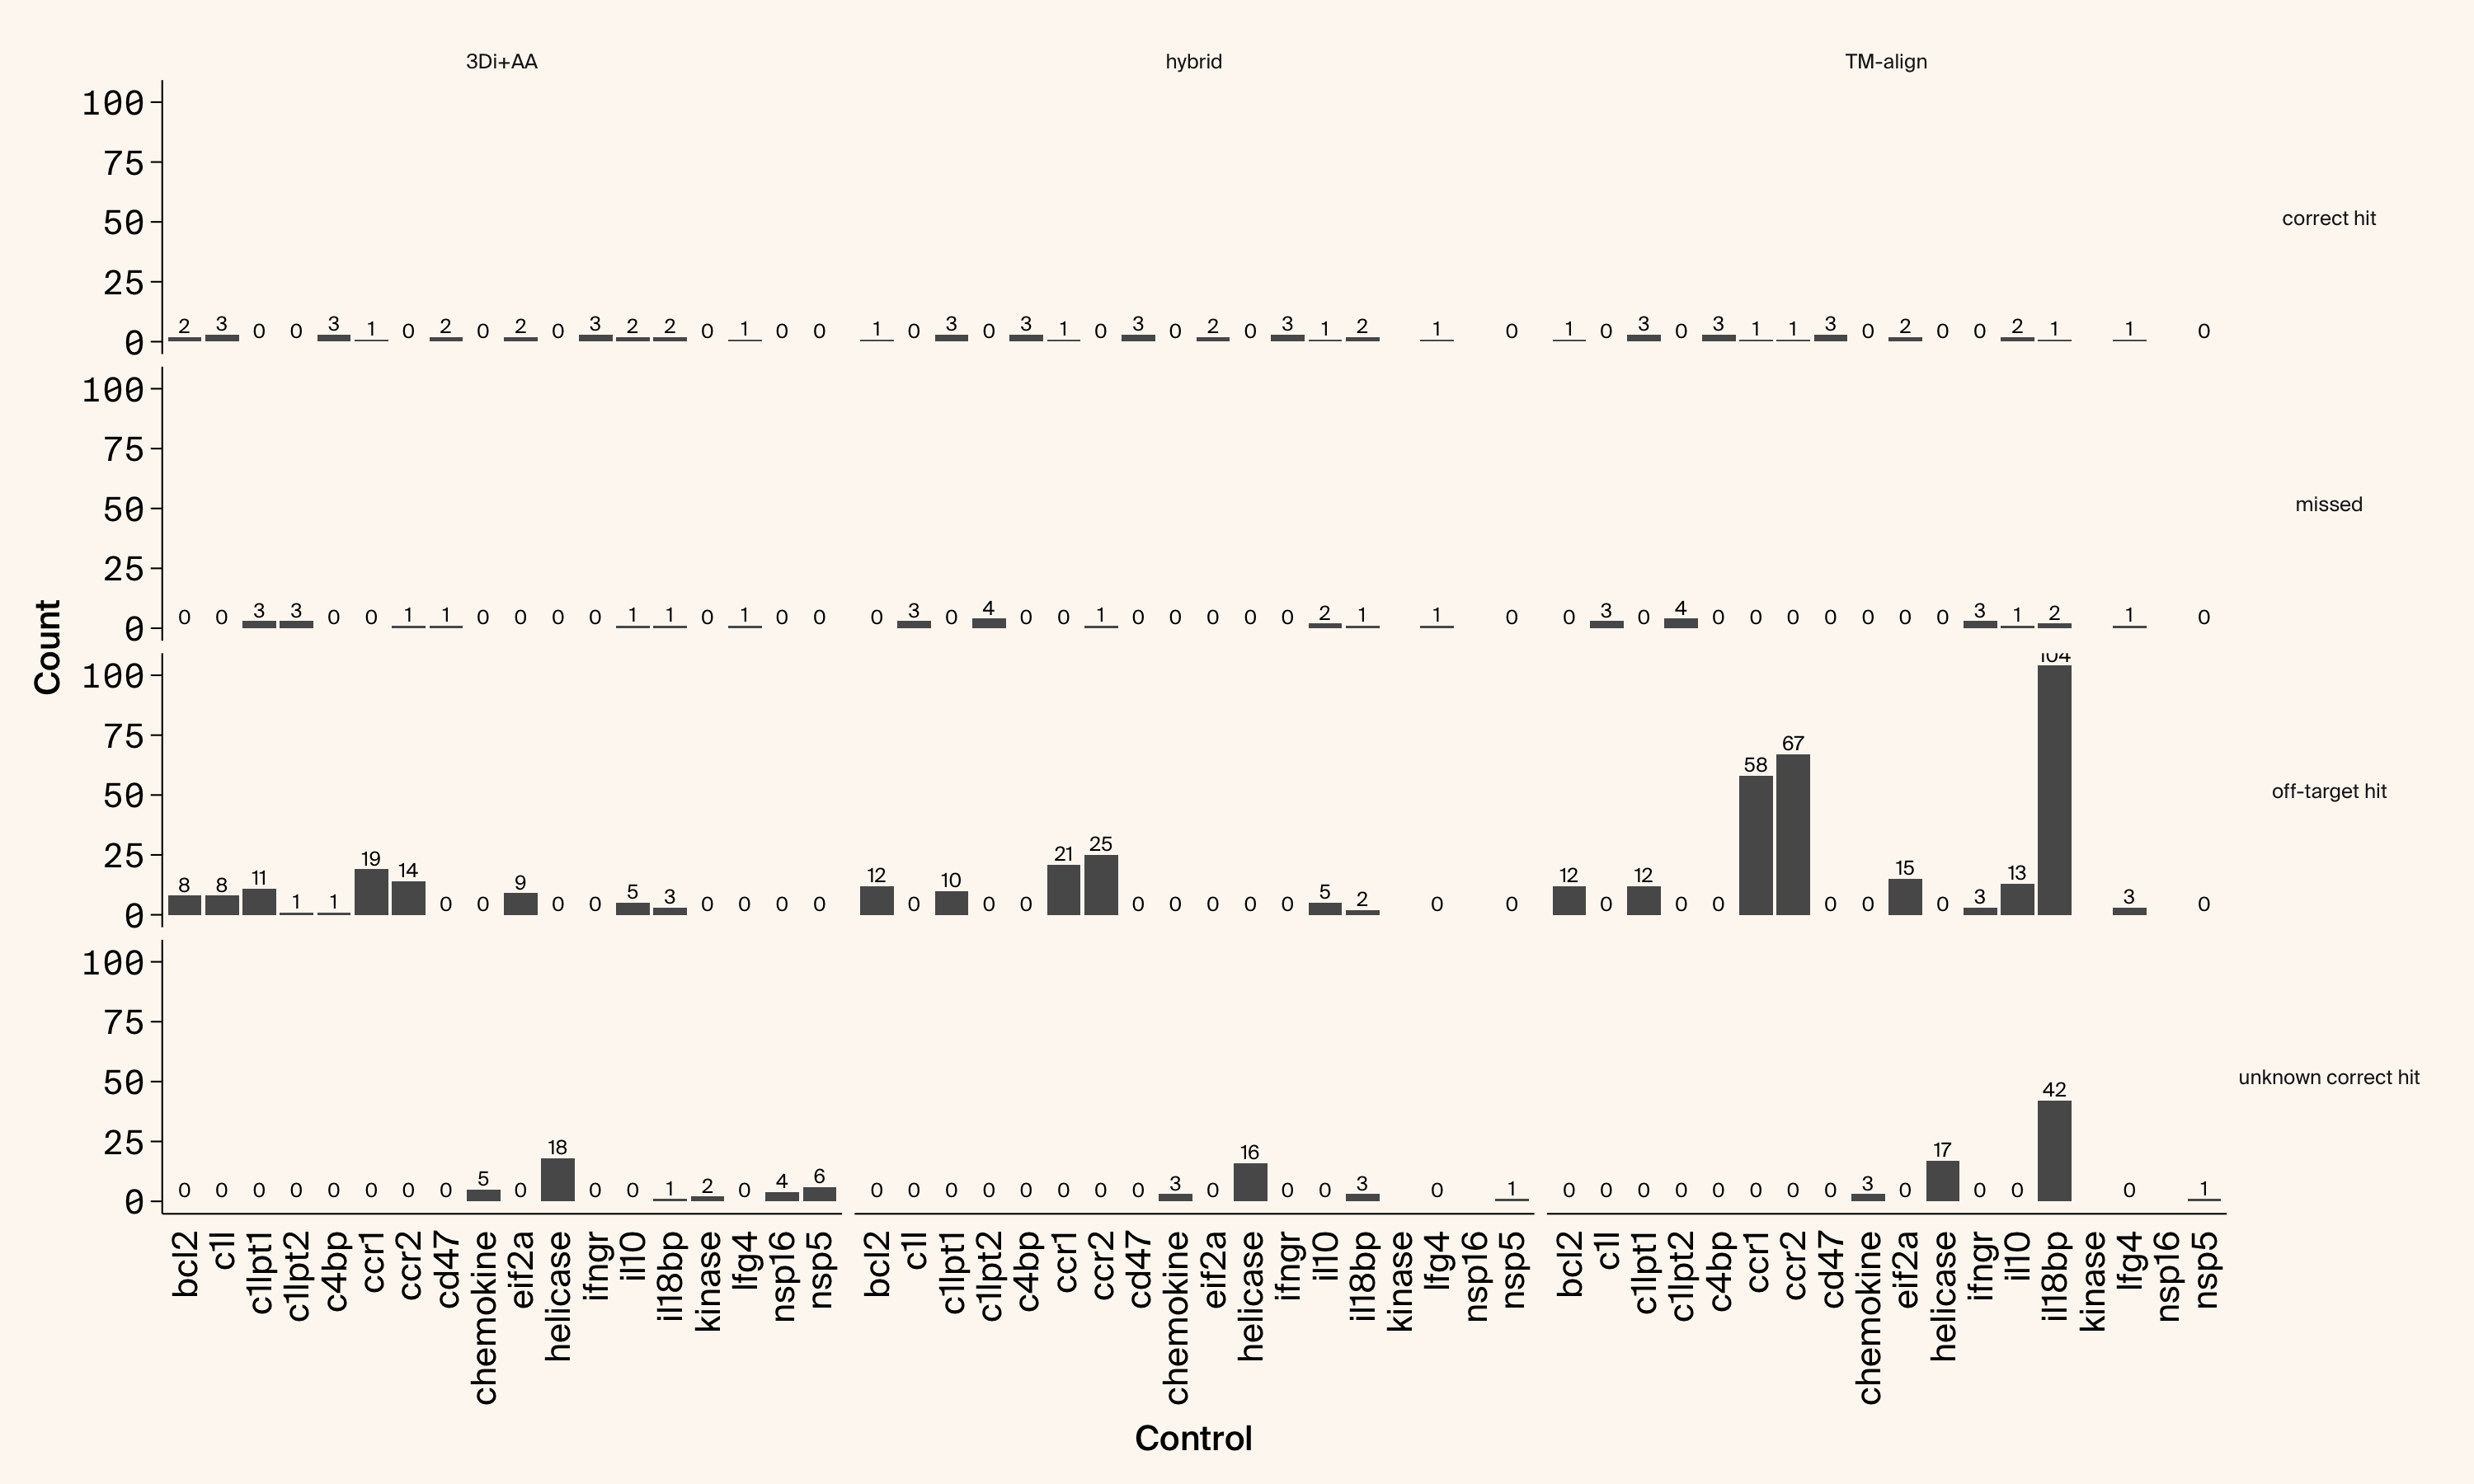

In [15]:
ggplot(summary_table_long, aes(x = control, y = count)) +
  geom_bar(stat = "identity", position = "stack") +
  # Add total counts above each full bar
  geom_text(data = totals,
            aes(x = control, y = total, label = total),
            vjust = -0.3,
            size = 3, family = CATEGORICAL_FONT) +
  facet_grid(cols = vars(model_type), rows = vars(hit_type)) +
  theme_arcadia(x_axis_type = "categorical") +
  labs(x = "Control", y = "Count", fill = "Hit Type") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        strip.text = element_text(family = CATEGORICAL_FONT),
        strip.text.y = element_text(angle = 0))

In [16]:
sessionInfo()

R version 4.4.3 (2025-02-28)
Platform: x86_64-apple-darwin13.4.0
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/libopenblasp-r0.3.29.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: system (macOS)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] arcadiathemeR_0.1.0 lubridate_1.9.4     forcats_1.0.0      
 [4] stringr_1.5.1       dplyr_1.1.4         purrr_1.0.4        
 [7] readr_2.1.5         tidyr_1.3.1         tibble_3.2.1       
[10] ggplot2_3.5.2       tidyverse_2.0.0    

loaded via a namespace (and not attached):
 [1] bit_4.6.0         gtable_0.3.6      jsonlite_2.0.0    compiler_4.4.3   
 [5] crayon_1.5.3      tidyselect_1.2.1  IRdisplay_1.1     parallel_4.4.3   
 [9] snakecase_0.11.1  scales_1.3.0      uuid_1.2-1      